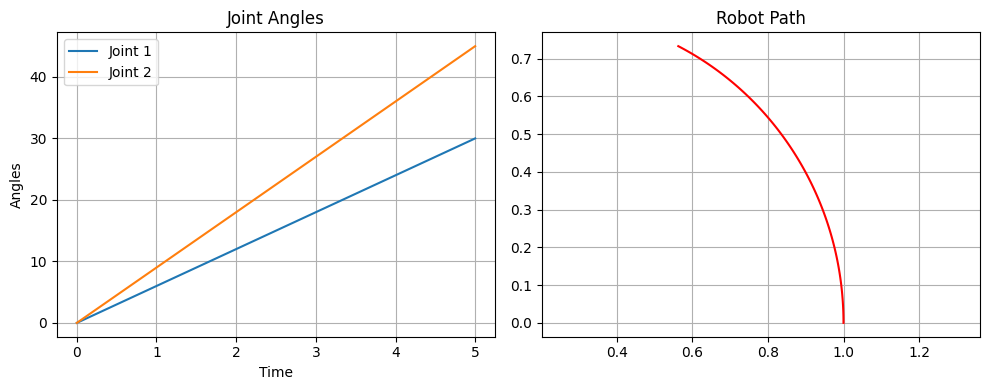

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

N = 100        
T = 5.0        
dt = T / (N-1)  

q_start = np.array([0, 0])
q_end = np.array([30, 45])

def objective(x):
    q = x.reshape((N, 2))
    v = (q[1:] - q[:-1]) / dt
    cost_v = np.sum(v**2)
    return cost_v

def start_constraint(x):
    q = x.reshape((N, 2))
    return q[0] - q_start

def end_constraint(x):
    q = x.reshape((N, 2))
    return q[-1] - q_end

cons = [
    {'type': 'eq', 'fun': start_constraint},
    {'type': 'eq', 'fun': end_constraint}
]
initial_guess = np.linspace(q_start, q_end, N).flatten()

res = minimize(objective, initial_guess, constraints=cons, method='SLSQP')

q_opt = res.x.reshape((N, 2))
q1_opt = q_opt[:, 0]
q2_opt = q_opt[:, 1]

time = np.linspace(0, T, N)
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(time, q1_opt, label='Joint 1')
plt.plot(time, q2_opt, label='Joint 2')
plt.title("Joint Angles")
plt.xlabel("Time")
plt.ylabel("Angles")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
def coordinate(q1, q2, l1=0.5, l2=0.5):
    x1 = l1 * np.cos(np.radians(q1))
    y1 = l1 * np.sin(np.radians(q1))
    x2 = x1 + l2 * np.cos(np.radians(q1 + q2))
    y2 = y1 + l2 * np.sin(np.radians(q1 + q2))
    return x2, y2

ee_x, ee_y = coordinate(q1_opt, q2_opt)
plt.plot(ee_x, ee_y, 'r-')
plt.title("Robot Path")
plt.axis('equal')
plt.grid(True)

plt.tight_layout()
plt.show()